<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Decision_Support_System_(DSS)_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/My Drive/Praktikum SIAB/Dataset Praktikum2/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

print("Data awal:")
print(df.head())


Data awal:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

EDA

In [13]:

df  = pd.read_csv("/content/drive/My Drive/Praktikum SIAB/Dataset Praktikum2/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()
df.info()
df['Churn'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count
Churn,
No,5174
Yes,1869


Visualisasi Data Awal

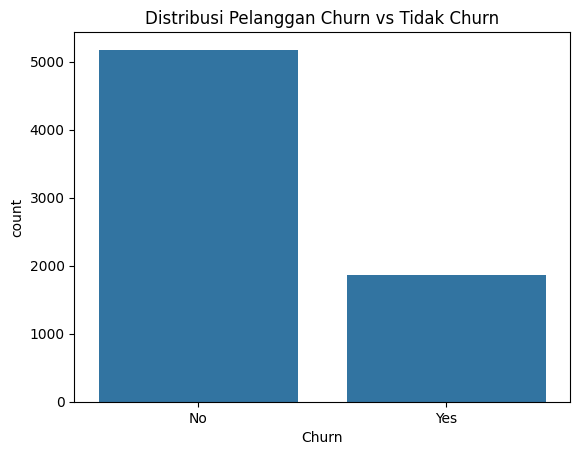

In [14]:
#distribusi churn
sns.countplot(x='Churn', data=df)
plt.title("Distribusi Pelanggan Churn vs Tidak Churn")
plt.show()

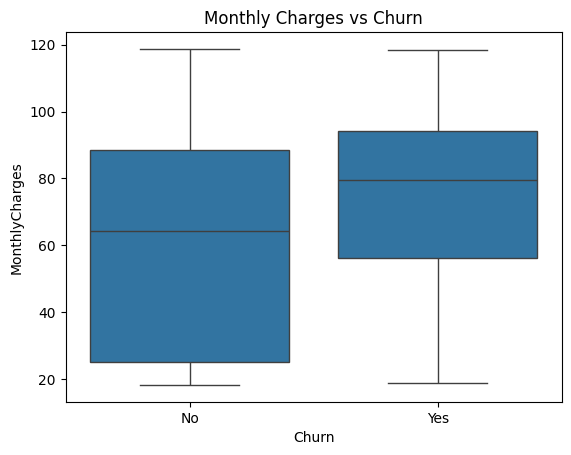

In [15]:
#rata-rata MonthlyCharges per status churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

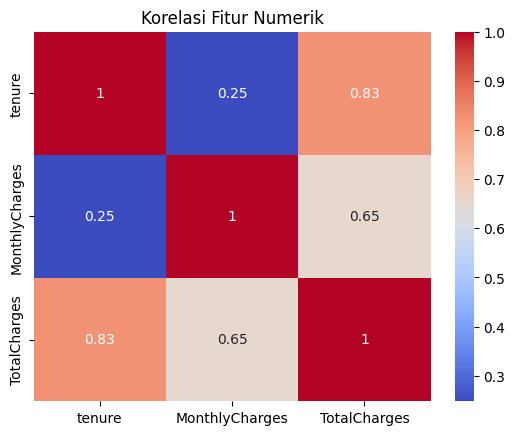

In [16]:
#korelasi numerik
num_cols = ['tenure','MonthlyCharges','TotalCharges']
df[num_cols] = df[num_cols].apply(pd.to_numeric,
errors='coerce')  # jaga2 tipe string
sns.heatmap(df[num_cols].corr(), annot=True,
cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

Preprocessing

In [17]:
df = df.dropna(subset=['TotalCharges'])

In [18]:
df['Churn_Flag'] = df['Churn'].map({'No':0, 'Yes':1})

Memilih Fitur Training Model

In [21]:
feature_cols = [
'tenure','MonthlyCharges','TotalCharges',
'Contract','InternetService','PaymentMethod','gender','SeniorCitizen' ]

Memisahkan Kolom Categorical

In [22]:
cat_cols = ['Contract','InternetService','PaymentMethod','gender']
num_cols = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']

One-Code Encoding fitur categorical

In [24]:
f_model = pd.get_dummies(df[feature_cols], columns=cat_cols,
drop_first=True)

Choose Fitur X n Y

In [44]:
# Buang baris yang nilai targetnya kosong
df = df.dropna(subset=['Churn_Flag'])

# Feature dan Target
df_model = df.drop(['Churn'], axis=1)  # buang kolom Churn asli jika ada
X = df_model
y = df['Churn_Flag']


Split Datase

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.3,
stratify=y,
random_state=42
)
print("Train:", X_train.shape, " Test:", X_test.shape)

Train: (4922, 7062)  Test: (2110, 7062)


Classification

In [46]:
# Buang baris yang nilai targetnya kosong
df = df.dropna(subset=['Churn_Flag'])

# Feature dan Target
df_model = df.drop(['Churn'], axis=1)  # buang kolom Churn asli jika ada
X = df_model
y = df['Churn_Flag']


In [50]:
# ==== Train Test Split ====
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== Scaling ====
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# ==== Model Logistic Regression ====
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_s, y_train)     # <--- WAJIB


LogisticRegression(max_iter=1000, random_state=42)

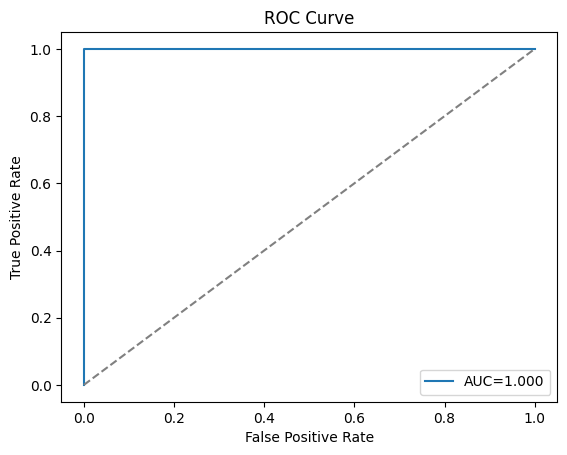

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilitas kelas positif
y_proba = logreg.predict_proba(X_test_s)[:, 1]

# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],'--',c='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


DSS untuk Retensi Pelanggan

In [55]:
def dss_rekomendasi_retensi(data_row, model, scaler, threshold=0.9):
    """
    data_row : DataFrame 1 baris (fitur yang sama seperti X)
    model    : model klasifikasi terlatih (LogisticRegression)
    scaler   : StandardScaler yang dipakai saat training
    threshold: batas probabilitas untuk menganggap 'berisiko churn'
    """
    # Pastikan urutan kolom sesuai
    data_scaled = scaler.transform(data_row)

    # Probabilitas kelas 1 (churn)
    proba_churn = model.predict_proba(data_scaled)[0, 1]

    # Logika rekomendasi
    if proba_churn >= 0.8:
        rekom = "HIGH RISK — Hubungi segera; tawarkan retention deal"
    elif proba_churn >= threshold:
        rekom = "MEDIUM RISK — Kirim penawaran khusus"
    else:
        rekom = "LOW RISK — Monitoring rutin"

    return proba_churn, rekom


def dss_rekomendasi_batch(model, X_batch, scaler, top_n=None, threshold=0.6):
    # Scaling batch data
    proba_churn_scaled = scaler.transform(X_batch)
    proba_churn = model.predict_proba(proba_churn_scaled)[:, 1]

    # Copy output + tambah kolom
    out = X_batch.copy().reset_index(drop=True)
    out['prob_churn'] = proba_churn

    # Buat rekomendasi per baris
    out['rekomendasi'] = out['prob_churn'].apply(
        lambda p: "HIGH RISK — Hubungi segera; tawarkan retention deal"
        if p >= 0.8 else
        ("MEDIUM RISK — Kirim penawaran khusus" if p >= threshold else "LOW RISK — Monitoring rutin")
    )

    # Urutkan dari risiko tertinggi
    out = out.sort_values('prob_churn', ascending=False).reset_index(drop=True)

    # Jika ingin ambil top-N pelanggan paling berisiko
    if top_n:
        return out.head(top_n)
    return out


Memberikan rekomendasi secara Massal

In [57]:
sample = X_test.iloc[[0]]
proba, rekom = dss_rekomendasi_retensi(sample, logreg, scaler,
threshold=0.6)
print("Probabilitas churn:", round(proba, 2))
print("Rekomendasi DSS   :", rekom)
top20 = dss_rekomendasi_batch(logreg, X_test, scaler, top_n=20,
threshold=0.9)
if 'top20' in locals(): print("\n20 Pelanggan dengan Risiko Churn Tertinggi:"); print(top20[['prob_churn','rekomendasi']].head(10))

Probabilitas churn: 0.0
Rekomendasi DSS   : LOW RISK — Monitoring rutin

20 Pelanggan dengan Risiko Churn Tertinggi:
   prob_churn                                        rekomendasi
0    0.987393  HIGH RISK — Hubungi segera; tawarkan retention...
1    0.987059  HIGH RISK — Hubungi segera; tawarkan retention...
2    0.986630  HIGH RISK — Hubungi segera; tawarkan retention...
3    0.985980  HIGH RISK — Hubungi segera; tawarkan retention...
4    0.982361  HIGH RISK — Hubungi segera; tawarkan retention...
5    0.982001  HIGH RISK — Hubungi segera; tawarkan retention...
6    0.981815  HIGH RISK — Hubungi segera; tawarkan retention...
7    0.981693  HIGH RISK — Hubungi segera; tawarkan retention...
8    0.981398  HIGH RISK — Hubungi segera; tawarkan retention...
9    0.981312  HIGH RISK — Hubungi segera; tawarkan retention...
